# Things to do

create classes to fit UML

link to UML https://lucid.app/lucidchart/a96d9bac-49c9-4c3a-80c9-9ffcadad963a/edit?viewport_loc=-226%2C-66%2C2815%2C1544%2C0_0&invitationId=inv_798a6ca1-2b93-4207-b799-b99117d6e534

Am interested in the visualization of city usage vs number of edges

# Google drive mounting

In [ ]:
# Mount Drive
import os
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
distances = pd.read_csv("/content/drive/My Drive/RouteRunners/Large-Scale-Route-Optimization/distance.csv")

In [ ]:
distances.head()

,Source,Destination,Distance(M)
0,City_24,City_47,1114251
1,City_24,City_31,97187
2,City_24,City_54,1716028
3,City_24,City_53,1729925
4,City_24,City_19,1594107


# Graph Creation

In [ ]:
def create_random_graph(distances_df, num_edges=500):
    """
    Creates a random graph using adjacency lists, randomly sampling from a distances DataFrame.

    Parameters:
        distances_df (pd.DataFrame): Must have ['Source', 'Destination', 'Distance(M)']
        num_edges (int): Number of edges to sample.

    Returns:
        graph (dict): Adjacency list {node: [(neighbor, weight), ...]}
    """
    sampled_edges = distances_df.sample(n=num_edges)
    graph = {}

    for _, row in sampled_edges.iterrows():
        src, dst, dist = row['Source'], row['Destination'], row['Distance(M)']
        graph.setdefault(src, []).append((dst, dist))
        graph.setdefault(dst, []).append((src, dist))  # Undirected graph

    return graph


# Dijkstra Algorithm

In [ ]:
def dijkstra(graph, start, goal):
    """
    Dijkstra's algorithm using basic data structures (no heapq).

    Parameters:
        graph (dict): {node: [(neighbor, weight), ...]}
        start (str): Starting node.
        goal (str): Goal node.

    Returns:
        distance (float): Total distance from start to goal.
        path (list): List of nodes representing the shortest path.
    """
    unvisited = set(graph.keys())
    distances = {node: float('inf') for node in graph}
    previous = {node: None for node in graph}

    distances[start] = 0

    while unvisited:
        # Find the unvisited node with the smallest distance
        current = min((node for node in unvisited), key=lambda node: distances[node])

        if distances[current] == float('inf') or current == goal:
            break

        unvisited.remove(current)

        for neighbor, weight in graph[current]:
            if neighbor in unvisited:
                new_dist = distances[current] + weight
                if new_dist < distances[neighbor]:
                    distances[neighbor] = new_dist
                    previous[neighbor] = current

    if distances[goal] == float('inf'):
        return float('inf'), []

    # Reconstruct path
    path = []
    node = goal
    while node:
        path.insert(0, node)
        node = previous[node]

    return distances[goal], path


# Generating graphs and get paths

In [ ]:
def generate_random_graphs_and_paths(distances_df, start, goal, num_graphs, num_edges_per_graph=300):
    """
    Generates random graphs and finds shortest paths from start to goal using Dijkstra's.

    Returns:
        paths (list of lists): List of shortest paths (each is a list of nodes)
    """
    paths = []
    for i in range(num_graphs):
        graph = create_random_graph(distances_df, num_edges=num_edges_per_graph)
        _, path = dijkstra(graph, start, goal)
        if path:  # Ignore if no path found
            paths.append(path)
    return paths


# Count Paths

In [ ]:
def count_edge_usage(paths):
    """
    Count how often each undirected edge appears in the list of paths.

    Returns:
        edge_counts (dict): {(node1, node2): frequency}
    """
    edge_counts = {}
    for path in paths:
        for i in range(len(path) - 1):
            edge = tuple(sorted((path[i], path[i+1])))
            if edge in edge_counts:
                edge_counts[edge] += 1
            else:
                edge_counts[edge] = 1
    return edge_counts


In [ ]:
def count_failed_paths(paths):
    """
    Counts how many paths are empty (i.e., no valid path found).

    Parameters:
        paths (list of lists): List of shortest paths.

    Returns:
        failed_count (int): Number of empty paths.
    """
    return sum(1 for path in paths if not path)


# Make a Heatmap

In [ ]:
def display_edge_usage_table(edge_counts, top_n=20):
    """
    Prints the most frequently used edges in sorted order.

    Parameters:
        edge_counts (dict): Output from count_edge_usage
        top_n (int): How many top edges to show
    """
    sorted_edges = sorted(edge_counts.items(), key=lambda x: -x[1])
    print(f"{'Edge':<30}Usage")
    print("-" * 40)
    for (a, b), count in sorted_edges[:top_n]:
        print(f"({a}, {b}):".ljust(30), count)


# Test 1

In [ ]:
paths = generate_random_graphs_and_paths(distances, 'City_24', 'City_47', num_graphs=200)
print(f"Number of Graphs with no path", count_failed_paths(paths))
edge_usage1 = count_edge_usage(paths)
display_edge_usage_table(edge_usage1, 50)

Number of Graphs with no path 0


In [ ]:
display_edge_usage_table(edge_usage1, 50)

Edge                          Usage
----------------------------------------
(City_24, City_47):            23
(City_24, City_28):            15
(City_0, City_24):             14
(City_24, City_25):            14
(City_23, City_24):            14
(City_2, City_24):             13
(City_2, City_47):             12
(City_24, City_8):             12
(City_33, City_47):            12
(City_23, City_47):            12
(City_24, City_29):            12
(City_47, City_8):             11
(City_24, City_30):            11
(City_25, City_47):            11
(City_28, City_47):            11
(City_32, City_47):            10
(City_42, City_47):            10
(City_24, City_39):            9
(City_24, City_31):            9
(City_39, City_47):            8
(City_31, City_47):            8
(City_1, City_2):              7
(City_27, City_47):            7
(City_45, City_47):            7
(City_1, City_24):             6
(City_22, City_24):            6
(City_30, City_47):            6
(City_22, City_

obviously the edge between the start and end is the fastest

Will recreate some functions to allow for the creation of graphs that do not include these edges

# Creation of Graph that avoids direct start and end edge

In [ ]:
def create_random_graph(distances_df, num_edges=500, exclude_edge=None):
    """
    Creates a random graph using adjacency lists, randomly sampling from a distances DataFrame.

    Parameters:
        distances_df (pd.DataFrame): Must have ['Source', 'Destination', 'Distance(M)']
        num_edges (int): Number of edges to sample.
        exclude_edge (tuple): Optional (node1, node2) to exclude the edge (in either direction).

    Returns:
        graph (dict): Adjacency list {node: [(neighbor, weight), ...]}
    """

    if exclude_edge:
        node1, node2 = exclude_edge
        mask1 = ~((distances_df['Source'] == node1) & (distances_df['Destination'] == node2))
        mask2 = ~((distances_df['Source'] == node2) & (distances_df['Destination'] == node1))
        filtered_df = distances_df[mask1 & mask2]
    else:
        filtered_df = distances_df

    sampled_edges = filtered_df.sample(n=num_edges)
    graph = {}

    for _, row in sampled_edges.iterrows():
        src, dst, dist = row['Source'], row['Destination'], row['Distance(M)']
        graph.setdefault(src, []).append((dst, dist))
        graph.setdefault(dst, []).append((src, dist))  # Undirected graph

    return graph


In [ ]:
def generate_random_graphs_and_paths(distances_df, start, goal, num_graphs=100, num_edges_per_graph=300, exclude_direct_edge=False):
    """
    Generates random graphs and finds shortest paths from start to goal using Dijkstra's.

    Parameters:
        exclude_direct_edge (bool): If True, excludes direct edge between start and goal from each graph.

    Returns:
        paths (list of lists): List of shortest paths (each is a list of nodes)
    """
    paths = []
    for i in range(num_graphs):
        exclude = (start, goal) if exclude_direct_edge else None
        graph = create_random_graph(distances_df, num_edges=num_edges_per_graph, exclude_edge=exclude)
        _, path = dijkstra(graph, start, goal)
        if path:
            paths.append(path)
    return paths


# Test 2

In [ ]:
paths = generate_random_graphs_and_paths(distances, 'City_24', 'City_47', num_graphs=200, exclude_direct_edge=True)
print(f"Number of graphs with no path: ", count_failed_paths(paths))
edge_usage2 = count_edge_usage(paths)

Number of graphs with no path:  0


In [ ]:
display_edge_usage_table(edge_usage2, 50)

Edge                          Usage
----------------------------------------
(City_33, City_47):            20
(City_24, City_29):            17
(City_42, City_47):            15
(City_32, City_47):            15
(City_24, City_28):            14
(City_25, City_47):            13
(City_23, City_47):            13
(City_47, City_8):             12
(City_31, City_47):            12
(City_24, City_37):            12
(City_1, City_24):             12
(City_24, City_30):            11
(City_24, City_8):             11
(City_24, City_25):            11
(City_24, City_31):            10
(City_22, City_24):            10
(City_2, City_24):             10
(City_24, City_45):            8
(City_23, City_24):            8
(City_44, City_47):            8
(City_29, City_31):            8
(City_45, City_47):            7
(City_24, City_33):            7
(City_24, City_27):            7
(City_24, City_39):            7
(City_0, City_24):             7
(City_27, City_47):            7
(City_22, City_

# Creating a edge Heatmap

In [ ]:
def plot_edge_usage_heatmap(edge_counts):
    """
    Plots a heatmap of edge usage frequencies. Assumes undirected edges.
    """
    # Get all unique node names
    nodes = set()
    for edge in edge_counts:
        nodes.update(edge)
    nodes = sorted(nodes)

    # Initialize a square DataFrame
    usage_matrix = pd.DataFrame(0, index=nodes, columns=nodes)

    # Fill in edge usage counts
    for (a, b), count in edge_counts.items():
        usage_matrix.loc[a, b] = count
        usage_matrix.loc[b, a] = count  # symmetric for undirected

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(usage_matrix, cmap='Reds', linewidths=0.5)
    plt.title("Edge Usage Heatmap (Shortest Path Frequency)")
    plt.xlabel("Destination Node")
    plt.ylabel("Source Node")
    plt.show()

# Heatmaps of Test 1 and Test 2

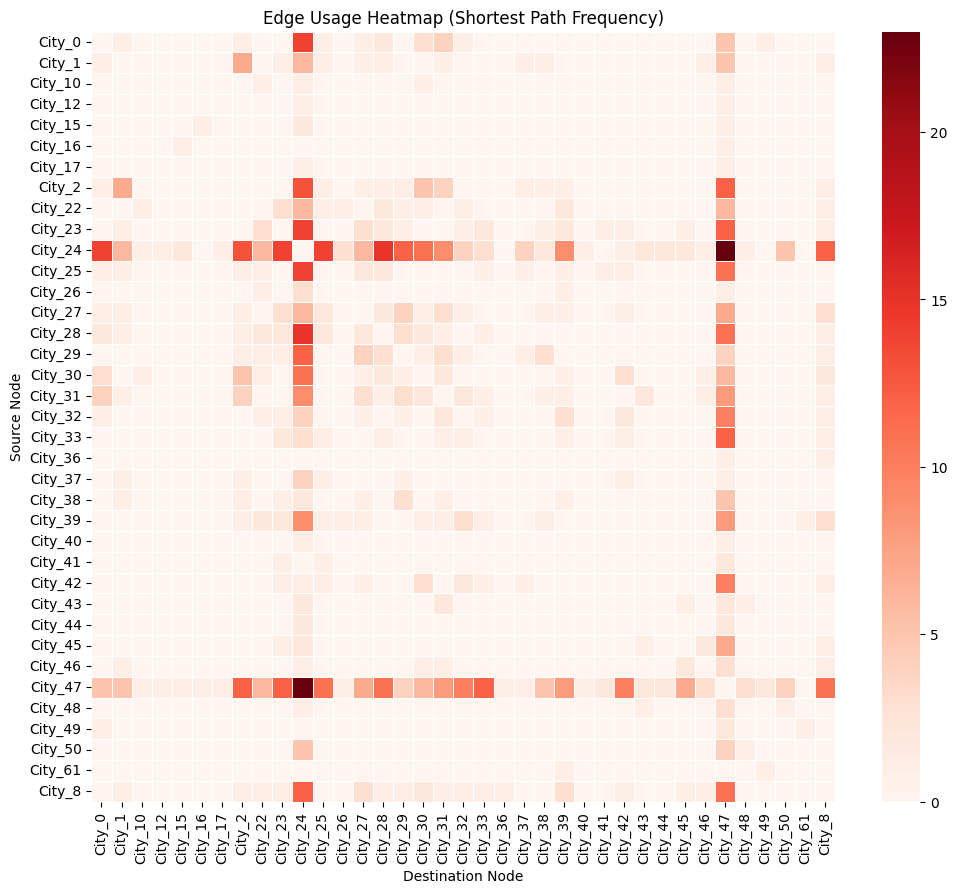

In [ ]:
plot_edge_usage_heatmap(edge_usage1)

The cities 47 and 24 are always used

The edges 24 - 47 and 47 - 24(the direct routes) will always be used if present

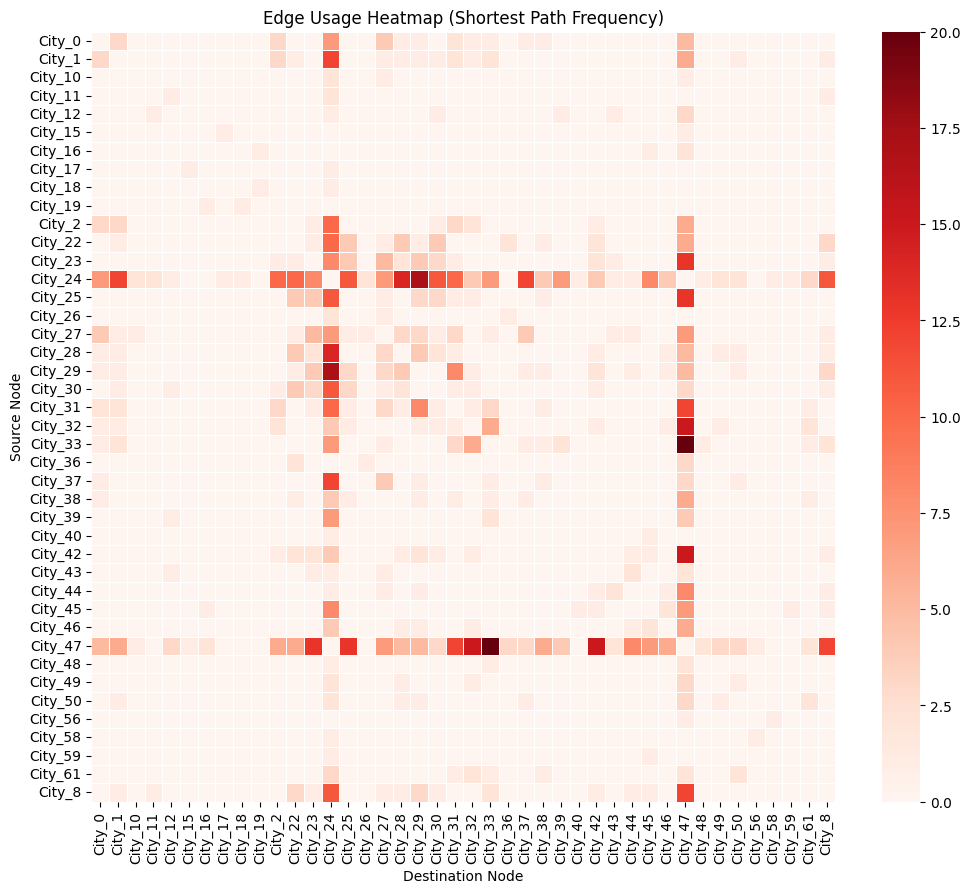

In [ ]:
plot_edge_usage_heatmap(edge_usage2)

edges directly connects to either edge 24 or 47 are the most frequently used

# Creating a City Heatmap

## Count the cities

In [ ]:
def count_city_usage(edge_usage):
    """
    Counts how often each city appears in all edges from shortest paths.

    Parameters:
        edge_usage (dict): {(city1, city2): frequency}

    Returns:
        city_counts (dict): {city: total frequency across edges}
    """
    city_counts = {}
    for (city1, city2), count in edge_usage.items():
        if city1 in city_counts:
            city_counts[city1] += count
        else:
            city_counts[city1] = count

        if city2 in city_counts:
            city_counts[city2] += count
        else:
            city_counts[city2] = count

    return city_counts


In [ ]:
def plot_city_usage_heatmap(city_counts, top_n=None):
    """
    Plots a horizontal heatmap (bar chart style) of city usage frequencies,
    excluding the top 2 most-used cities.

    Parameters:
        city_counts (dict): Output from count_city_usage()
        top_n (int): Show only top-N most-used cities (after removing top 2)
    """
    city_df = pd.DataFrame(list(city_counts.items()), columns=["City", "Usage"])
    city_df = city_df.sort_values("Usage", ascending=False)

    city_df = city_df.iloc[2:]

    if top_n:
        city_df = city_df.head(top_n)

    plt.figure(figsize=(0.5 * len(city_df), 4))
    sns.heatmap(
        city_df.set_index("City").T,
        cmap="Reds",
        cbar=True,
        linewidths=0.5,
        annot=True,
        fmt='d'
    )
    plt.title("City Usage in Shortest Paths (Excluding Start and End Cities)")
    plt.yticks([])
    plt.show()


### Errors to be fixed

Also it seems like cities are being counted twice (uncomfirmed)

## City Heatmaps

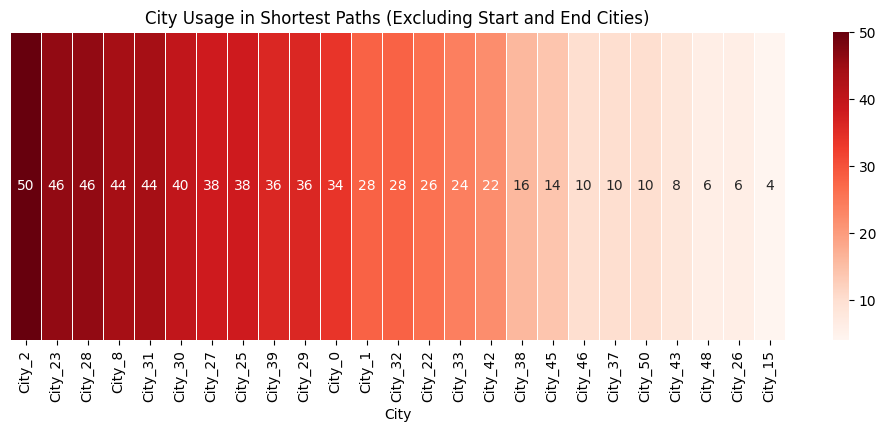

In [ ]:
city_usage = count_city_usage(edge_usage1)
plot_city_usage_heatmap(city_usage, top_n=25)

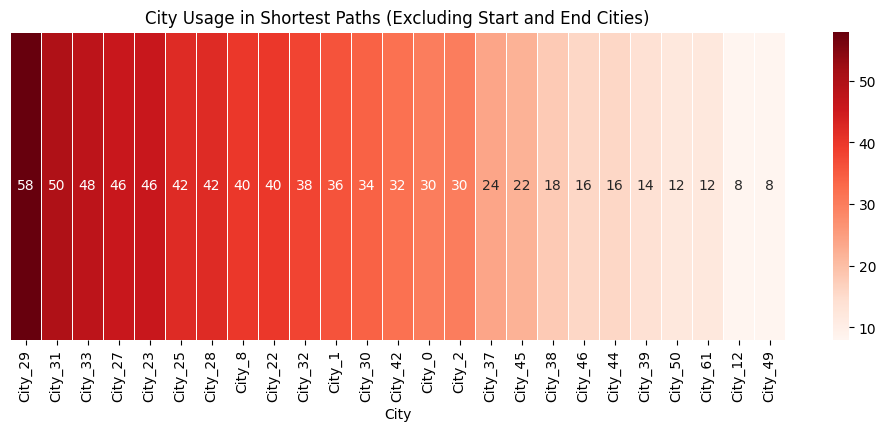

In [ ]:
city_usage = count_city_usage(edge_usage2)
plot_city_usage_heatmap(city_usage, top_n=25)

# Testing results with significantly less edges

## test including the direct route

In [ ]:
paths = generate_random_graphs_and_paths(distances, 'City_24', 'City_47', num_graphs=200, num_edges_per_graph = 200)
print(f"Number of graphs with no path: ", count_failed_paths(paths))
edge_usage3 = count_edge_usage(paths)

Number of graphs with no path:  0


In [ ]:
display_edge_usage_table(edge_usage3, 50)

Edge                          Usage
----------------------------------------
(City_24, City_47):            32
(City_24, City_31):            14
(City_23, City_24):            12
(City_24, City_28):            12
(City_33, City_47):            11
(City_24, City_27):            10
(City_32, City_47):            10
(City_24, City_25):            10
(City_23, City_47):            8
(City_24, City_30):            7
(City_22, City_47):            7
(City_2, City_24):             7
(City_31, City_47):            7
(City_24, City_29):            6
(City_37, City_47):            6
(City_27, City_47):            6
(City_47, City_8):             6
(City_47, City_48):            6
(City_1, City_24):             6
(City_46, City_47):            6
(City_42, City_47):            6
(City_28, City_47):            6
(City_24, City_39):            6
(City_25, City_47):            6
(City_1, City_47):             6
(City_24, City_36):            5
(City_41, City_47):            5
(City_24, City_8):      

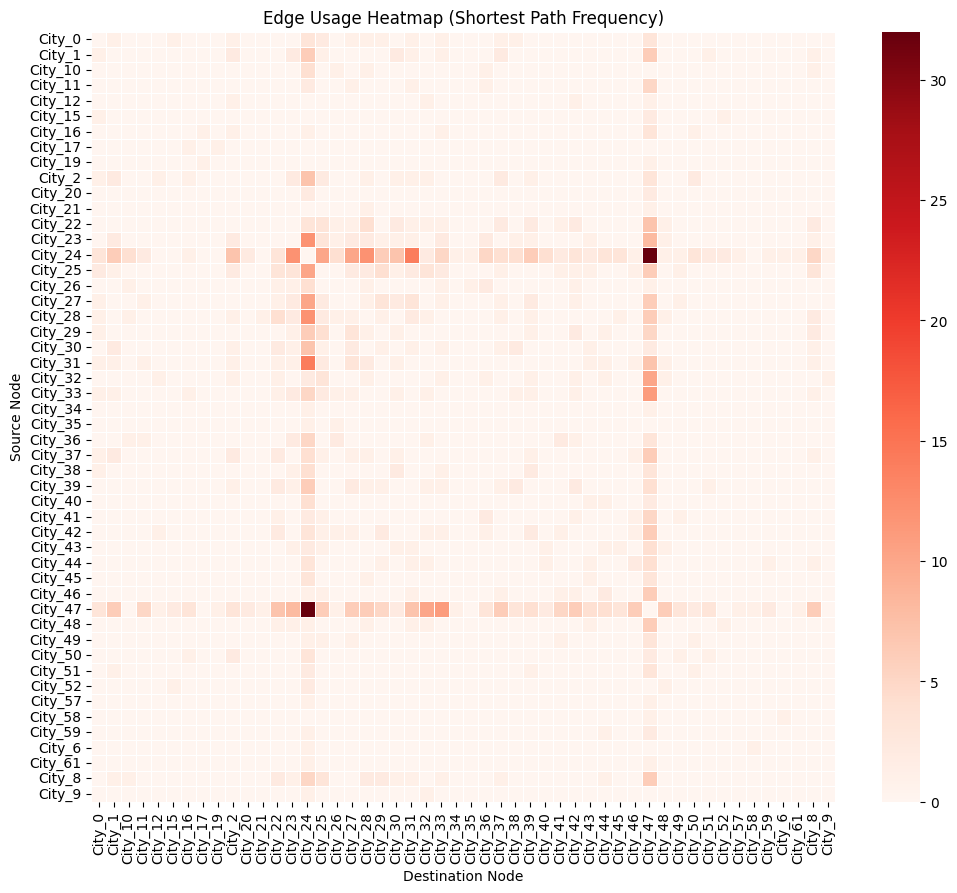

In [ ]:
plot_edge_usage_heatmap(edge_usage3)

## test excluding the direct route

In [ ]:
paths = generate_random_graphs_and_paths(distances, 'City_24', 'City_47', num_graphs=200, num_edges_per_graph = 200, exclude_direct_edge=True)
print(f"Number of graphs with no path: ", count_failed_paths(paths))
edge_usage4 = count_edge_usage(paths)

Number of graphs with no path:  0


In [ ]:
display_edge_usage_table(edge_usage4)

Edge                          Usage
----------------------------------------
(City_24, City_27):            13
(City_42, City_47):            13
(City_24, City_31):            12
(City_2, City_24):             10
(City_27, City_47):            9
(City_44, City_47):            9
(City_23, City_47):            9
(City_33, City_47):            9
(City_32, City_47):            9
(City_45, City_47):            9
(City_24, City_38):            9
(City_1, City_24):             8
(City_23, City_24):            8
(City_10, City_24):            8
(City_24, City_39):            8
(City_46, City_47):            8
(City_24, City_25):            8
(City_24, City_28):            8
(City_24, City_29):            8
(City_38, City_47):            8


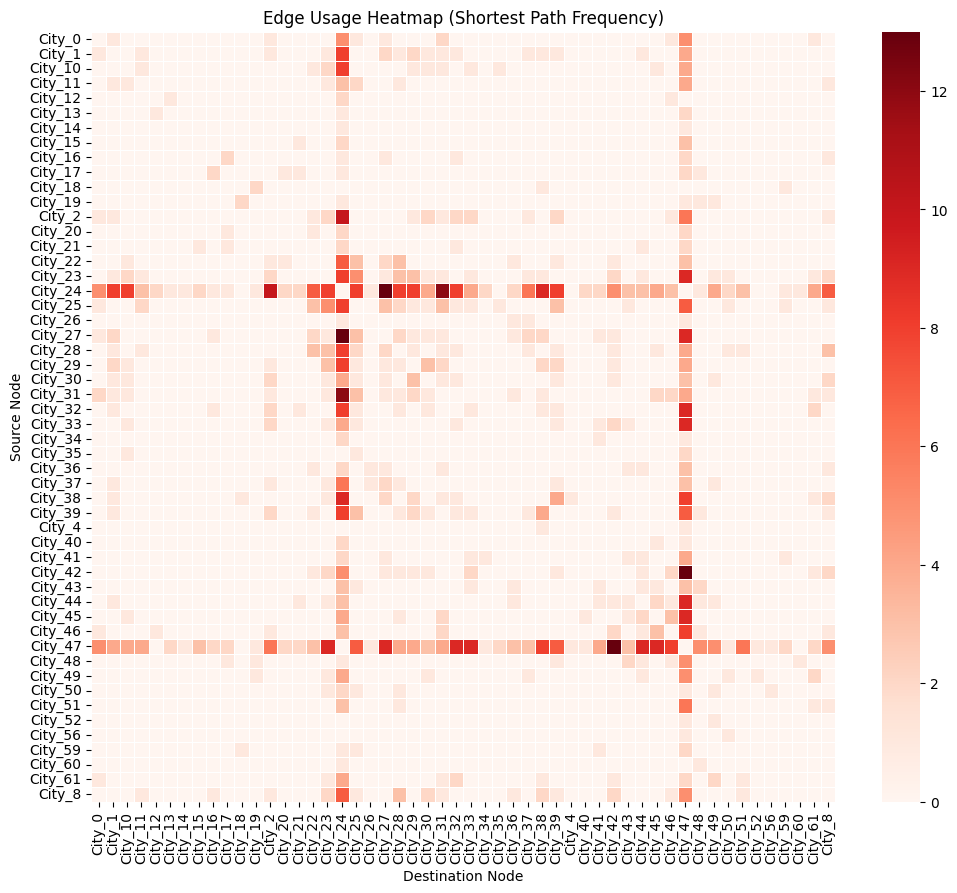

In [ ]:
plot_edge_usage_heatmap(edge_usage4)

### Are there more cities being used than before?

In [ ]:
city_usage1 = count_city_usage(edge_usage1)
len(city_usage1)

37

In [ ]:
city_usage2 = count_city_usage(edge_usage2)
len(city_usage2)

42

In [ ]:
city_usage3 = count_city_usage(edge_usage3)
len(city_usage3)

50

In [ ]:
city_usage4 = count_city_usage(edge_usage4)
len(city_usage4)

52

### Is there a more diverse usage of cities?

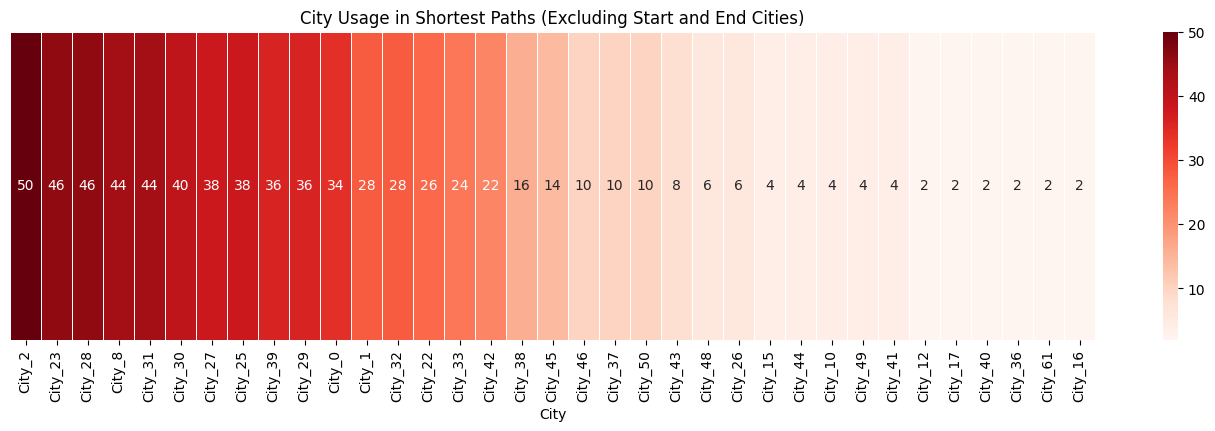

In [ ]:
plot_city_usage_heatmap(city_usage1, top_n=50)

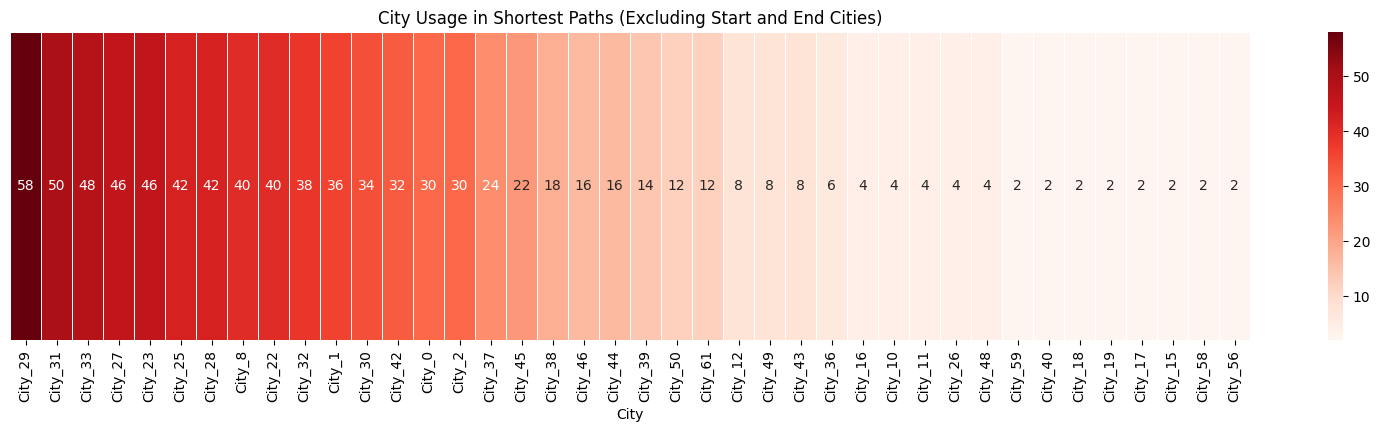

In [ ]:
plot_city_usage_heatmap(city_usage2, top_n=50)

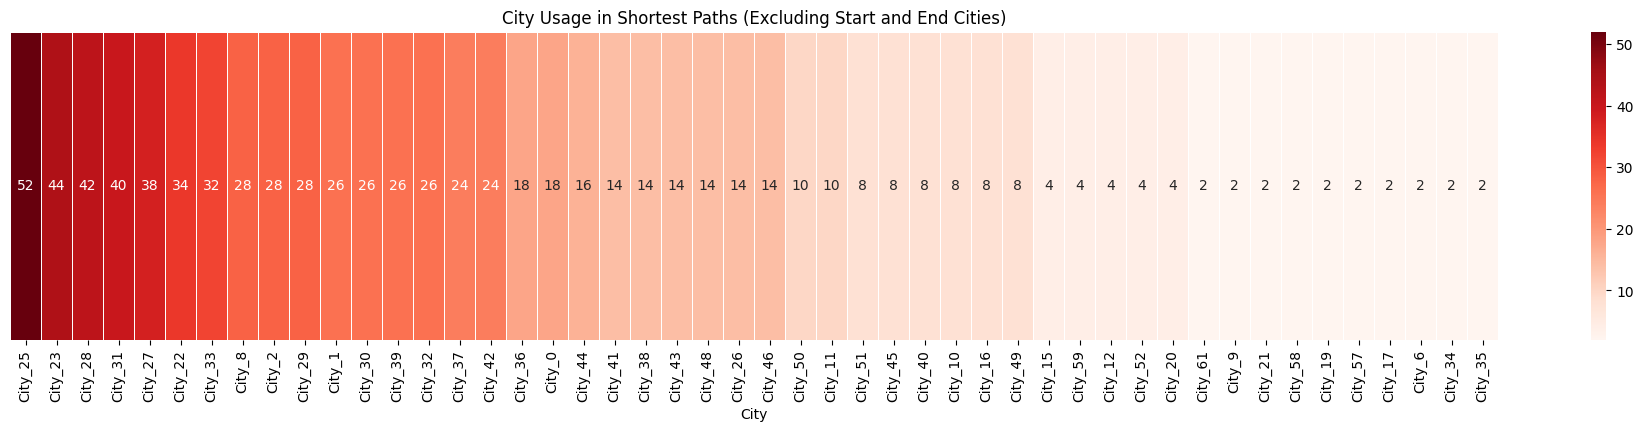

In [ ]:
plot_city_usage_heatmap(city_usage3, top_n=50)

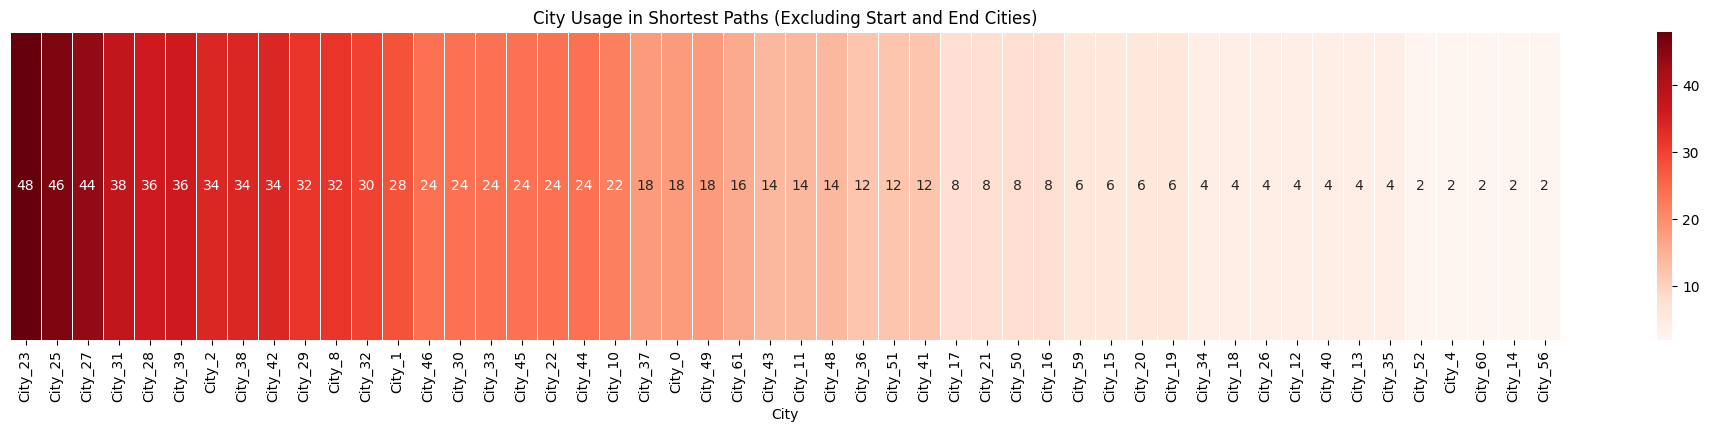

In [ ]:
plot_city_usage_heatmap(city_usage4, top_n=50)

## Conclusions of these test

reducing the number of edges increases the number of cities present in the heatmap

There is a less obvious gadient in the difference between frequently used cities and less frequently used cities in the graphs with less edges